<a href="https://colab.research.google.com/github/vaidhyesh1/Machine-Learning-HW/blob/main/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pearson Coefficient between stamina and Combat Point is 0.58


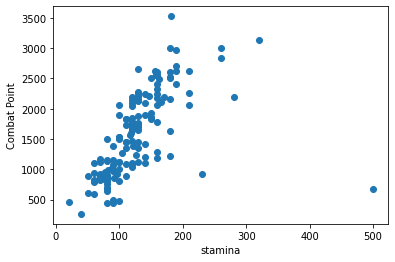

Pearson Coefficient between attack_value and Combat Point is 0.91


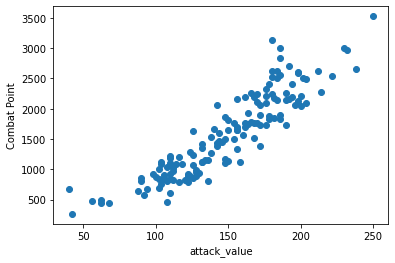

Pearson Coefficient between defense_value and Combat Point is 0.83


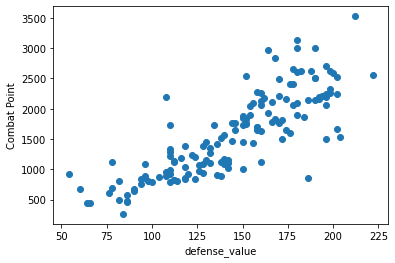

Pearson Coefficient between capture_rate and Combat Point is -0.74


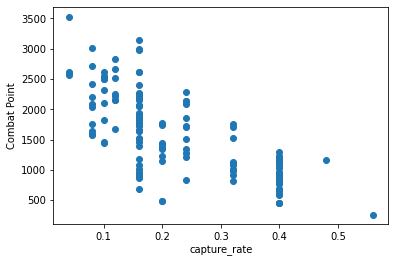

Pearson Coefficient between flee_rate and Combat Point is -0.41


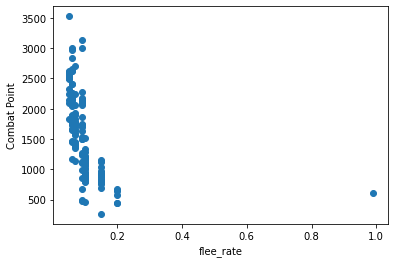

Pearson Coefficient between spawn_chance and Combat Point is -0.42


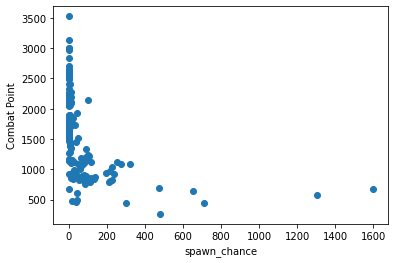

In [31]:
import pandas as pd
import math
import numpy as np
import math 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Homework 2/hw2_data.csv')
numerical_attr = ['stamina','attack_value','defense_value','capture_rate','flee_rate','spawn_chance']
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
for attr in numerical_attr:
  combat_arr_tr = df[['combat_point']].to_numpy()
  numerical_arr_tr = df[[attr]].to_numpy()
  combat_arr = np.transpose(combat_arr_tr)
  numerical_arr = np.transpose(numerical_arr_tr)
  pearson_coeff = np.corrcoef(combat_arr[0],numerical_arr[0])[0, 1]
  print('Pearson Coefficient between %s and Combat Point is %0.2f' % (attr,pearson_coeff))
  plt.scatter(numerical_arr[0], combat_arr[0]) 
  plt.xlabel(attr)
  plt.ylabel('Combat Point')
  plt.show()

Pearson Coefficient between stamina and attack_value is 0.30


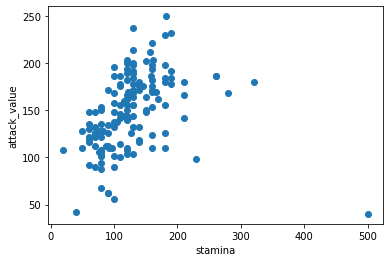

Pearson Coefficient between stamina and defense_value is 0.30


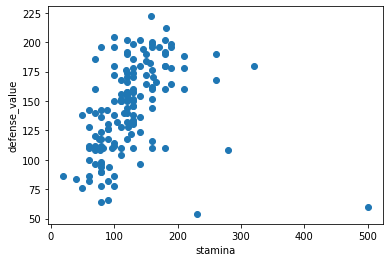

Pearson Coefficient between stamina and capture_rate is -0.45


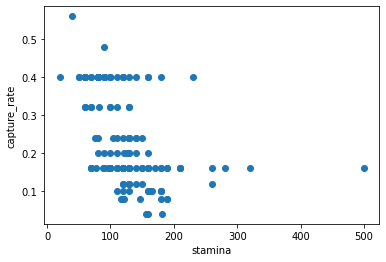

Pearson Coefficient between stamina and flee_rate is -0.27


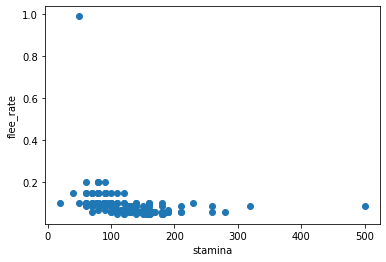

Pearson Coefficient between stamina and spawn_chance is -0.28


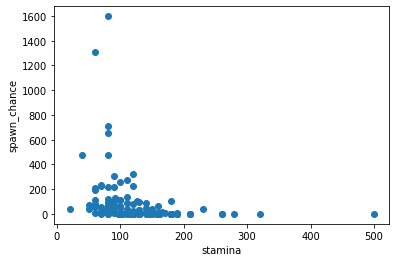

Pearson Coefficient between attack_value and defense_value is 0.74


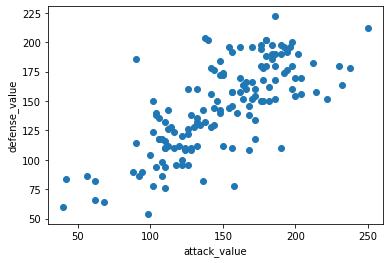

Pearson Coefficient between attack_value and capture_rate is -0.69


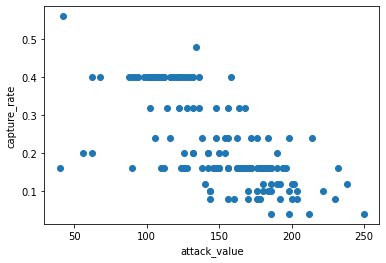

Pearson Coefficient between attack_value and flee_rate is -0.37


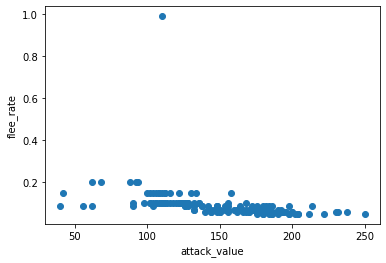

Pearson Coefficient between attack_value and spawn_chance is -0.43


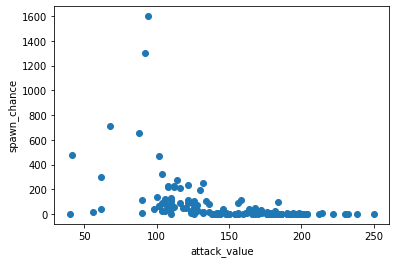

Pearson Coefficient between defense_value and capture_rate is -0.70


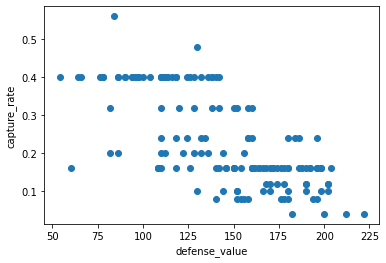

Pearson Coefficient between defense_value and flee_rate is -0.42


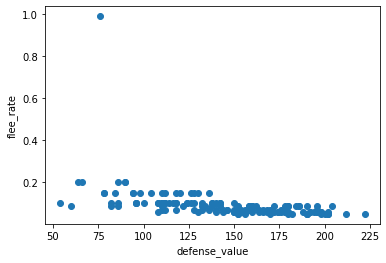

Pearson Coefficient between defense_value and spawn_chance is -0.43


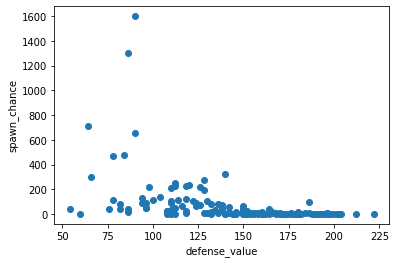

Pearson Coefficient between capture_rate and flee_rate is 0.44


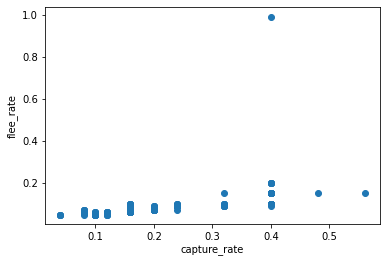

Pearson Coefficient between capture_rate and spawn_chance is 0.47


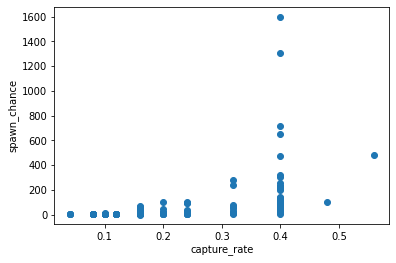

Pearson Coefficient between flee_rate and spawn_chance is 0.29


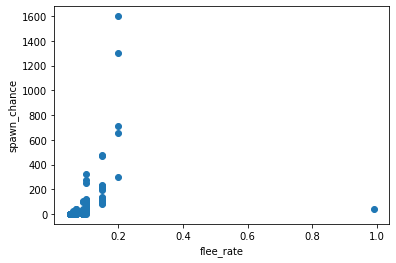

In [8]:
import itertools
combos = list(itertools.combinations(numerical_attr, 2))
for (a,b) in combos:
  a_tr = df[[a]].to_numpy()
  b_tr = df[[b]].to_numpy()
  a_arr = np.transpose(a_tr)
  b_arr = np.transpose(b_tr)
  pearson_coeff = np.corrcoef(a_arr[0],b_arr[0])[0, 1]
  print('Pearson Coefficient between %s and %s is %0.2f' % (a,b,pearson_coeff))
  plt.scatter(df[[a]], df[[b]]) 
  plt.xlabel(a)
  plt.ylabel(b)
  plt.show()


In [7]:
df_after_hot_wo_combat = pd.get_dummies(df.drop(['combat_point'], axis=1), columns=["primary_strength"])
df_hot_with_combat = pd.concat([df_after_hot_wo_combat, df[['combat_point']]], axis=1)
df_hot_with_combat

,name,stamina,attack_value,defense_value,capture_rate,flee_rate,spawn_chance,primary_strength_Bug,primary_strength_Dragon,primary_strength_Electric,primary_strength_Fairy,primary_strength_Fighting,primary_strength_Fire,primary_strength_Ghost,primary_strength_Grass,primary_strength_Ground,primary_strength_Ice,primary_strength_Normal,primary_strength_Poison,primary_strength_Psychic,primary_strength_Rock,primary_strength_Water,combat_point
0,Bulbasaur,90,126,126,0.16,0.10,69.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1079
1,Ivysaur,120,156,158,0.08,0.07,4.20,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1643
2,Venusaur,160,198,200,0.04,0.05,1.70,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2598
3,Charmander,78,128,108,0.16,0.10,25.30,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,962
4,Charmeleon,116,160,140,0.08,0.07,1.20,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Aerodactyl,160,182,162,0.16,0.09,1.80,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2180
142,Snorlax,320,180,180,0.16,0.09,1.60,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3135
143,Dratini,82,128,110,0.32,0.09,30.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,990
144,Dragonair,122,170,152,0.08,0.06,2.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1760


In [34]:
def RSS(df, W):
  df_wo_result = df.drop(['combat_point'], axis=1)
  if not isinstance(W, np.ndarray):
    fx = df_wo_result.to_numpy().dot(W.to_numpy())
  else:
    fx = df_wo_result.to_numpy().dot(W)
  Y = df[['combat_point']].to_numpy()
  diff = np.subtract(Y, fx)
  return (diff.T).dot(diff)[0][0]

def linearRegressionOLS(X,Y):
  x = X.to_numpy()
  y = Y.to_numpy()
  return pd.DataFrame(np.linalg.pinv(np.transpose(x).dot(x)).dot(np.transpose(x).dot(y)))

def gradientDescent(X,Y,completeDataFrame,initialWeights, lambdaVal, regularization, epsilon=100, alphaVal = math.exp(-20), iterationCount = 1000):
  y = Y.to_numpy()
  x = X.to_numpy()
  wStar = initialWeights.to_numpy()
  iteration = 0
  rss = RSS(completeDataFrame, wStar)
  while iteration < iterationCount and math.sqrt(rss) > epsilon:
    iteration = iteration + 1
    rss = RSS(completeDataFrame, wStar)
    fx = x.dot(wStar)
    optimizer = alphaVal*(x.T.dot(np.subtract(fx,y)))
    wStarTemp = np.subtract(wStar,optimizer) 
    if regularization == 'l2':
      wStar = np.add(wStarTemp, lambdaVal * np.square(wStar))
    elif regularization == 'l1':
      wStar = np.add(wStarTemp, lambdaVal * np.sum(wStar))
  return wStar

def crossValidationAndTraining(algorithm = 'OLS', lambdaVal = 0.01, regularization = 'l2'):
  shuffled = df_hot_with_combat.sample(frac=1)
  split_elements = np.array_split(shuffled, 5)
  np.set_printoptions(precision=2)
  sum = 0
  listOfErrors = []
  listOfRss = []
  for j in range(0,5):
    testing_df = split_elements[j]
    testing_df = testing_df.drop(['name'], axis = 1)
    testing_df.insert(0,'bias',1)
    training_list = [x for i,x in enumerate(split_elements) if i!=j]
    training_df = pd.concat(training_list)
    if 'bias' in training_df.columns:
      training_df = training_df.drop(['bias'], axis=1)
    training_df.insert(0,'bias',1)
    training_df = training_df.drop(['name'], axis = 1)
    training_df_wo_result = training_df.drop(['combat_point'], axis = 1)
    weights  = pd.DataFrame(1, index=np.arange(1, 2), columns=np.arange(22)).T
    individualRSS = RSS(training_df, weights)
    listOfRss.append(math.sqrt(individualRSS))
    sum = sum + individualRSS
    if algorithm == 'OLS':
      new_weight = linearRegressionOLS(training_df_wo_result, training_df[['combat_point']])
    elif algorithm == 'Regression':
      new_weight = gradientDescent(training_df_wo_result, training_df[['combat_point']],training_df,weights,lambdaVal,regularization)
    else:
      raise ValueError('Algorithm not in the list. Try OLS or Regression')
    listOfErrors.append(math.sqrt(RSS(testing_df, new_weight)))
  average = math.sqrt(sum / 5)
  return {'optimizedRSS':np.array(listOfErrors), 'unOptimizedAverage':average, 'individualRSSErrors': np.array(listOfRss)}

# Using OLS
print('Using OLS algorithm to solve linear regression')
results = crossValidationAndTraining()
print('Average RSS without linear regression %.2f' % results['unOptimizedAverage'])

print('Individual RSS Values')
print(results['individualRSSErrors'])

print('RSS of each subset after cross validation and linear regression using OLS')
print(results['optimizedRSS'])
print('The average RSS after linear regression with OLS is %.2f' % (np.mean(results['optimizedRSS'])) )


#Using Gradient Descent with L2-regularization
print('\nUsing Gradient Descent with L2 regularization algorithm to solve linear regression with lambda = e^-10')
results = crossValidationAndTraining(algorithm='Regression', lambdaVal=math.exp(-10), regularization = 'l2')
print('Average RSS without linear regression %.2f' % results['unOptimizedAverage'])

print('Individual RSS Values')
print(results['individualRSSErrors'])

print('RSS of each subset after cross validation and linear regression using Gradient Descent with L2 regularization')
print(results['optimizedRSS'])

print('The average RSS after linear regression with Gradient Descent with L2 regularization is %.2f' % (np.mean(results['optimizedRSS'])) )

#Features attack_value and defense_value have high pearson coefficient of 0.74. Therefore running linear regression
print('\nUsing features attack value and defense value to train')
X = df_hot_with_combat[['attack_value','defense_value']]
y = df.combat_point
generatedWeights = linearRegressionOLS(X,y)
finalRss = math.sqrt(RSS(pd.concat([X, y], axis=1), generatedWeights))
print('The RSS after using attack_value and defense_value is %.2f' % (finalRss))

#Feature attack_value and decision combat_point have high pearson coefficient of 0.91. Therefore running linear regression
print('\nUsing features attack value and defense value to train')
X = df_hot_with_combat[['attack_value']]
y = df.combat_point
generatedWeights = linearRegressionOLS(X,y)
finalRss = math.sqrt(RSS(pd.concat([X, y], axis=1), generatedWeights))
print('The RSS after using attack_value is %.2f' % (finalRss))

#Feature defense_value and decision combat_point have high pearson coefficient of 0.83. Therefore running linear regression
print('\nUsing features attack value and defense value to train')
X = df_hot_with_combat[['defense_value']]
y = df.combat_point
generatedWeights = linearRegressionOLS(X,y)
finalRss = math.sqrt(RSS(pd.concat([X, y], axis=1), generatedWeights))
print('The RSS after using defense_value is %.2f' % (finalRss))

#Using Gradient Descent with L1-regularization
print('\nUsing Gradient Descent with L1 regularization algorithm to solve linear regression with lambda = e^-10')
results = crossValidationAndTraining(algorithm='Regression', lambdaVal=math.exp(-10), regularization = 'l1')
print('Average RSS without linear regression %.2f' % results['unOptimizedAverage'])

print('Individual RSS Values')
print(results['individualRSSErrors'])

print('RSS of each subset after cross validation and linear regression using Gradient Descent with L1 regularization')
print(results['optimizedRSS'])

print('The average RSS after linear regression with Gradient Descent with L1 regularization is %.2f' % (np.mean(results['optimizedRSS'])) )



Using OLS algorithm to solve linear regression
Average RSS without linear regression 13873.93
Individual RSS Values
[14192.9  13850.43 13922.4  13914.86 13479.62]
RSS of each subset after cross validation and linear regression using OLS
[1653.51  572.04  724.97  595.64  663.87]
The average RSS after linear regression with OLS is 842.01

Using Gradient Descent with L2 regularization algorithm to solve linear regression with lambda = e^-10
Average RSS without linear regression 13873.93
Individual RSS Values
[13645.44 14074.13 14397.94 13876.99 13352.11]
RSS of each subset after cross validation and linear regression using Gradient Descent with L2 regularization
[1581.38 2628.45 1412.54 1286.   1349.01]
The average RSS after linear regression with Gradient Descent with L2 regularization is 1651.48

Using features attack value and defense value to train
The RSS after using attack_value and defense_value is 4074.18

Using features attack value and defense value to train
The RSS after using 

In [36]:


df['combat_point'] = (df["combat_point"] <= np.mean(df.combat_point.to_numpy())).astype(int)
X = df_after_hot_wo_combat.drop(['name'], axis=1)
y = df.combat_point
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
training_df_after_split = pd.concat([X_train, y_train], axis=1)

def logisitic_regression(X_train, X_test, y_train, y_test, lambdaVal = 1, regularize = True):
  if regularize:
    regularizationTerm = 'l2'
  else:
    regularizationTerm = 'none'
  logistic_reg = LogisticRegression(max_iter=5000, C = lambdaVal, penalty= regularizationTerm)
  logistic_reg.fit(X_train,y_train)
  y_pred_logistic = logistic_reg.predict(X_test)
  score = accuracy_score(y_test, y_pred_logistic)
  return {'prediction': y_pred_logistic, 'real_sample': y_test, 'accuracy': score, 'hyperparams': logistic_reg.get_params()}

#Logistic regression without regularization
regression_wo_reg = logisitic_regression(X_train, X_test, y_train, y_test, regularize = False)
print('Running Logisitic regression without regularization')
print(classification_report(regression_wo_reg['prediction'], regression_wo_reg['real_sample']))
print('Accuracy is '+str(regression_wo_reg['accuracy']))

#Logisitic regression with regularization and 5 fold cross validation
shuffled_logistic = training_df_after_split.sample(frac=1)
split_elements_logisitic = np.array_split(shuffled_logistic, 5)
regularizationList = [math.exp(-20), math.exp(-10), math.exp(-8), 0.001, 0.01, 0.1, 1]

for lambdaVal in regularizationList:
  sum = 0
  for j in range(0,5):
    print('\nRunning Logisitic regression with lambda = '+str(lambdaVal) +', iteration '+ str(j+1))
    testing_df = split_elements_logisitic[j]

    training_list = [x for i,x in enumerate(split_elements_logisitic) if i!=j]
    training_df = pd.concat(training_list)

    result = logisitic_regression(training_df.drop(['combat_point'],axis = 1), testing_df.drop(['combat_point'],axis = 1),training_df.combat_point, testing_df.combat_point, lambdaVal= lambdaVal)
    sum = sum + result['accuracy']
    print('Accuracy is '+str(result['accuracy']))
  average = sum / 5
  print('\nAverage accuracy lambda = '+ str(lambdaVal)+ ' after cross validation is : ' + str(average))

# Going with Logisitic Regression with L2-regularization with Test data
print('\nPerforming Logisitic Regression with Test data using lambda = e^-8')
regression_with_reg = logisitic_regression(X_train, X_test, y_train, y_test, lambdaVal= math.exp(-8))
print('Running Logisitic regression without regularization')
print(classification_report(regression_with_reg['prediction'], regression_with_reg['real_sample']))
print('Accuracy is '+str(regression_with_reg['accuracy']))


Running Logisitic regression without regularization
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        21
           1       0.64      0.78      0.70         9

    accuracy                           0.80        30
   macro avg       0.77      0.79      0.78        30
weighted avg       0.82      0.80      0.81        30

Accuracy is 0.8

Running Logisitic regression with lambda = 2.061153622438558e-09, iteration 1
Accuracy is 0.6666666666666666

Running Logisitic regression with lambda = 2.061153622438558e-09, iteration 2
Accuracy is 0.6086956521739131

Running Logisitic regression with lambda = 2.061153622438558e-09, iteration 3
Accuracy is 0.8260869565217391

Running Logisitic regression with lambda = 2.061153622438558e-09, iteration 4
Accuracy is 0.391304347826087

Running Logisitic regression with lambda = 2.061153622438558e-09, iteration 5
Accuracy is 0.5652173913043478

Average accuracy lambda = 2.061153622438558e-09 after c

(24, 1)